In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# hide warning message in notebook
import warnings
warnings.filterwarnings('ignore')

# File to load (Remember to change these)
mouse_drug_data_to_load="data/mouse_drug_data.csv"
clinical_trial_data_to_load="data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug=pd.read_csv(mouse_drug_data_to_load)
clinical_trial=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combine_data=pd.merge(clinical_trial, mouse_drug, how="left", on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
combine_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume=combine_data.loc[:, ["Drug", "Timepoint","Tumor Volume (mm3)"]]
groupby_drug_tim=tumor_volume.groupby(["Drug", "Timepoint"])
ave_tumor=groupby_drug_tim.mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_rep=pd.DataFrame({"Tumor Volume (mm3)": ave_tumor})

# Preview DataFrame
tumor_rep.reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standart_error_tumor=groupby_drug_tim.sem()['Tumor Volume (mm3)']

# Convert to DataFrame
standart_error=pd.DataFrame({'Tumor Volume (mm3)': standart_error_tumor})

# Preview DataFrame
standart_error.reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
data_reformat=tumor_rep.reset_index()
tumor_pivot=data_reformat.pivot(index="Timepoint",columns="Drug")['Tumor Volume (mm3)']

# Preview that Reformatting worked
tumor_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_stan_err_pivot_mean.index, tumor_stan_err_pivot_mean["Capomulin"], yerr=tumor_stan_err_pivot_mean["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_stan_err_pivot_mean.index, tumor_stan_err_pivot_mean["Infubinol"], yerr=tumor_stan_err_pivot_mean["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_stan_err_pivot_mean.index, tumor_stan_err_pivot_mean["Ketapril"], yerr=tumor_stan_err_pivot_mean["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_stan_err_pivot_mean.index, tumor_stan_err_pivot_mean["Placebo"], yerr=tumor_stan_err_pivot_mean["Placebo"], color="k", marker="D", markersize=5, linestyle="dashed", linewidth=0.50)
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="upper left", fontsize="small", fancybox=True)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

# Save the Figure
plt.savefig("Analysis/Fig.png")

NameError: name 'tumor_stan_err_pivot_mean' is not defined

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metas_sites=combine_data.loc[:, ["Drug", "Timepoint","Metastatic Sites"]]
groupby_drug_time=metas_sites.groupby(["Drug", "Timepoint"])
ave_metas=groupby_drug_time.mean()["Metastatic Sites"]

# Convert to DataFrame
metas_rep=pd.DataFrame({"Metastatic Sites": ave_metas})

# Preview DataFrame
metas_rep.reset_index()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standart_error_metas=groupby_drug_time.sem()['Metastatic Sites']

# Convert to DataFrame
metas_stan_error=pd.DataFrame({"Metastatic Sites": standart_error_metas})

# Preview DataFrame
metas_stan_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [15]:
# Minor Data Munging to Re-Format the Data Frames
data_reformat= metas_rep.reset_index()
metas_pivot=data_reformat.pivot(index="Timepoint",columns="Drug")['Metastatic Sites']

# Preview that Reformatting worked
metas_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


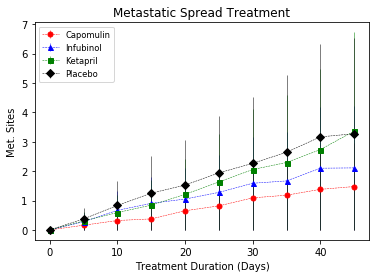

In [16]:
# Generate the Plot (with Error Bars)
plt.errorbar(metas_pivot.index, metas_pivot["Capomulin"], yerr=metas_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metas_pivot.index, metas_pivot["Infubinol"], yerr=metas_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metas_pivot.index, metas_pivot["Ketapril"], yerr=metas_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(metas_pivot.index, metas_pivot["Placebo"], yerr=metas_pivot["Placebo"], color="k", marker="D", markersize=5, linestyle="dashed", linewidth=0.50)
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="upper left", fontsize="small", fancybox=True)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread Treatment")

# Save the Figure
plt.savefig("Analysis/Fig2.png")

## Survival Rates

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate=combine_data.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
survival_rate

# Convert to DataFrame
survival_rate_dataframe=pd.DataFrame({'Mouse Count': survival_rate})

# Preview DataFrame
Survival_dataframe=survival_rate_dataframe.reset_index()
Survival_dataframe.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames
survival_count_pivot=Survival_dataframe.pivot(index="Timepoint",columns="Drug")["Mouse Count"]

# Preview that Reformatting worked
survival_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


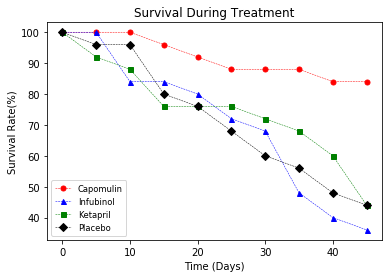

In [19]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * survival_count_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Placebo"] / 25, "kD", linestyle="dashed", markersize=5, linewidth=0.50)
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.title("Survival During Treatment")
# Save the Figure
plt.savefig("Analysis/Fig3.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
tumor_pct_change =  100 * (tumor_pivot.iloc[-1] - tumor_pivot.iloc[0]) / tumor_pivot.iloc[0]
# tumor_pct_change_sem =  100 * (tumor_pivot.iloc[-1] - tumor_pivot.iloc[0]) / tumor_pivot.iloc[0]

# Display the data to confirm
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

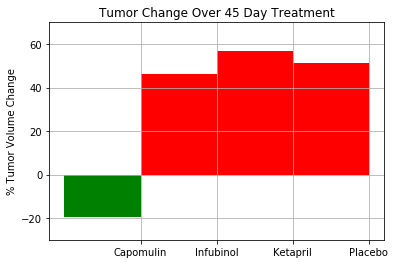

In [27]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"],
               tumor_pct_change["Infubinol"],
               tumor_pct_change["Ketapril"],
               tumor_pct_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')


# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

# Save the Figure
plt.savefig("Analysis/Fig4.png")

# Show the Figure
fig.show()